# Assignment 08: Control Charts for Variables II
Sydney Perrin

March 11th, 2022

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

## Import Data

In [2]:
df = pd.read_csv('08 data.csv')
#df.head(100)

## 1. The number of nonconformities found on inspection of a tape deck is shown in the data. Is the process in statistical control?
ANS: Yes, the process is in statistical control because there are no points out of bounds in the c chart.

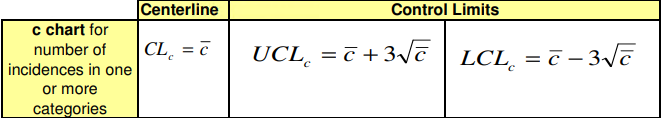

### c Chart Calculations

In [4]:
cbar = df.num_nonc.mean()
CL_c=cbar
UCL_c = cbar + 3*np.sqrt(cbar)
LCL_c = cbar - 3*np.sqrt(cbar)

print('CL_c=', CL_c)
print('UCL_c=',UCL_c)
print('LCL_c=',LCL_c)

CL_c= 1.5
UCL_c= 5.174234614174766
LCL_c= -2.174234614174767


### Plot c Chart

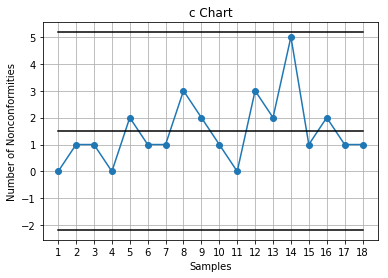

In [7]:
m=18
ucl_line = np.full(m,UCL_c) 
lcl_line = np.full(m,LCL_c) 
cl_line = np.full(m,CL_c) 
plt.plot(df.num_nonc,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('c Chart')
plt.ylabel('Number of Nonconformities')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## 2. What center line and control limits would you recommend for controlling future production?
ANS: The center line and control limits are CL=1.5, UCL=5.17 and LCL=-2.17

In [8]:
print('CL_c=', CL_c)
print('UCL_c=',UCL_c)
print('LCL_c=',LCL_c)

CL_c= 1.5
UCL_c= 5.174234614174766
LCL_c= -2.174234614174767


## 3. A police agency is studying the incidence of drivers operating their vehicles without insurance. The data are collected from drivers who have been stopped by an officer for a traffic law violation and a traffic summons issued. Data from three shifts over a ten-day period are shown in columns 'num_cit' (number of inspected) and 'num_wo' (number of without insurance). What is a CL for a u-chart?
ANS: The center line is CL=0.08778

In [10]:
ubar = df.num_wo.sum()/df.num_cit.sum()
CL_u=ubar
print('CL_u=', CL_u)

CL_u= 0.0877808988764045


## 4. Set up a varying limit chart for the process. Is the process in control?
ANS: See u chart in the code below. Yes, the process is in control because there are no points out of bounds in the control chart.

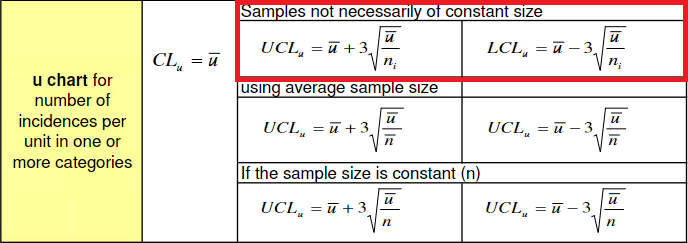

### u Chart Calculations

In [11]:
u= df.num_wo # number of defects
ni = df.num_cit
UCL_u = ubar + 3*np.sqrt(ubar/ni)
LCL_u = ubar - 3*np.sqrt(ubar/ni)

### Plot u Chart

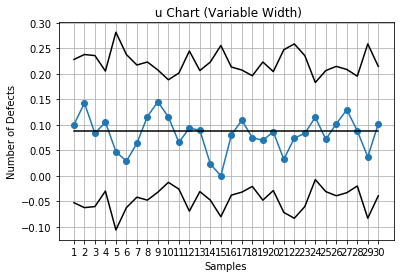

In [13]:
m=30
ucl_line = np.full(m,UCL_u) 
lcl_line = np.full(m,LCL_u) 
cl_line = np.full(m,CL_u)
plt.plot(u/ni,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title(' u Chart (Variable Width)')
plt.ylabel('Number of Defects')
plt.xlabel('Samples')
plt.show()

## 5. The types of nonconformities are classified as either A, B, C or D in a company. The weights used for each class are 100 for A, 50 for B, 10 for C and 1 for D. A sample of size 1500 was taken and the number of nonconformities per class is shown in the table. What is the total number of demerit points in the sample?
ANS: The total number of demerit points in the sample is 583.

In [14]:
# number of nonconformities per class:
numA = 2
numB = 5
numC = 12
numD = 13

# weights for each class
wtA = 100
wtB = 50
wtC = 10
wtD = 1

tot_num = wtA*numA + wtB*numB + wtC*numC + wtD*numD
print('tot_num=', tot_num)

tot_num= 583


## 6. What is the average number of each class of defect per unit?
ANS: The average number of each class of defect per unit is 0.00133 (or 2/1500) for class A, 0.00333 (or 5/1500) for class B, 0.008 (or 12/1500) for class C and 0.00867 (or 13/1500) for class D.

In [15]:
n=1500
ubarA = numA/n #2/1500
ubarB = numB/n #5/1500
ubarC = numC/n # 12/1500
ubarD = numD/n # 13/1500

print('ubarA=', ubarA)
print('ubarB=', ubarB)
print('ubarC=', ubarC)
print('ubarD=', ubarD)

ubarA= 0.0013333333333333333
ubarB= 0.0033333333333333335
ubarC= 0.008
ubarD= 0.008666666666666666


## 7. What are the control limits that should be used to construct a demerit control chart?
ANS: The control limits that should be used to contruct a demerit control chart are CL=0.389, UCL=0.756 and LCL=0.0214

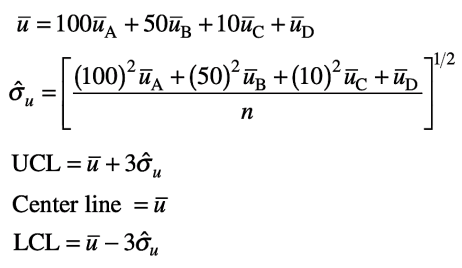

In [17]:
ubar = wtA*ubarA + wtB*ubarB + wtC*ubarC + wtD*ubarD
sigma_u = np.sqrt((100*100*ubarA + 50*50*ubarB + 10*10*ubarC + ubarD)/n)
CL = ubar
UCL = ubar + 3*sigma_u
LCL = ubar - 3*sigma_u

print('CL=', CL)
print('UCL', UCL)
print('LCL', LCL)

CL= 0.3886666666666667
UCL 0.7558886703647022
LCL 0.021444662968631234
